# Wine Quality Prediction Using Gradient Descent and Regularization

# AKASH NALLAGONDA



# 1. Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Only for splitting data, not for algorithms

# Load the white wine dataset with semicolon as the delimiter
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')


# Inspect the dataset's first few rows and column names
print("First few rows of the dataset:")
print(df.head())

# Print the column names to check for the target column
print("Column names in the dataset:")
print(df.columns)

# If 'quality' is the target column, we proceed, otherwise, update it accordingly
if 'quality' in df.columns:
    target_column = 'quality'
else:
    raise ValueError("The target column 'quality' was not found in the dataset. Please check the column names.")

# Define X (features) and Y (target)
X = df.drop(target_column, axis=1)
Y = df[target_column]

# Normalize features using Min-Max normalization
X = (X - X.min()) / (X.max() - X.min())

# Split the data into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Inspect the sizes of the datasets
print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)
print("Test set size:", X_test.shape)


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5 

# 2. Batch Gradient Descent Without Regularization

## Initialize Parameters and Functions

In [ ]:
# Initialize weight vector (n+1 dimensions including bias)
np.random.seed(42)
weights = np.random.randn(X_train.shape[1] + 1)  # Initialize with random values

# Add bias term to the training set
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Define hyperparameters
learning_rate = 0.001
epochs = 1000
mse_threshold = 1e-6

# Helper function to calculate MSE
def calculate_mse(X, Y, weights):
    predictions = np.dot(X, weights)
    errors = predictions - Y
    mse = np.mean(errors**2)
    return mse, errors

# Batch Gradient Descent without Regularization
def batch_gradient_descent(X, Y, weights, learning_rate, epochs, mse_threshold):
    m = len(Y)
    mse_history = []

    for epoch in range(epochs):
        mse, errors = calculate_mse(X, Y, weights)
        mse_history.append(mse)

        if mse < mse_threshold:
            break

        gradients = 2/m * X.T.dot(errors)
        weights = weights - learning_rate * gradients

    return weights, mse_history


### Train the Model Without Regularization

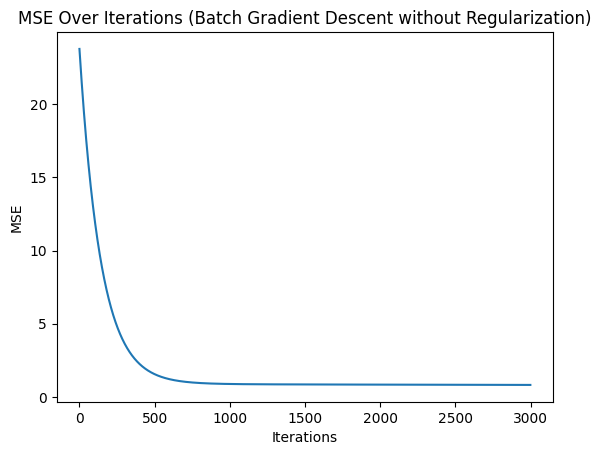

Final Weights (Batch Gradient Descent without Regularization):  [ 3.24625972  0.62680676  1.02060417  2.01018935 -0.02684183  0.00395734
  1.8511674   1.40742052 -0.19602186  1.63534191  0.36702136  1.00833814]


In [ ]:
# Batch Gradient Descent without Regularization
def batch_gradient_descent(X, Y, weights, learning_rate, epochs, mse_threshold):
    m = len(Y)
    mse_history = []

    for epoch in range(epochs):
        mse, errors = calculate_mse(X, Y, weights)
        mse_history.append(mse)

        if mse < mse_threshold:
            break

        gradients = 2/m * X.T.dot(errors)
        weights = weights - learning_rate * gradients

    return weights, mse_history

# Hyperparameters
learning_rate = 0.001  # Learning rate
epochs = 3000  # Updated number of epochs
mse_threshold = 0.01  # Updated threshold to stop early when MSE gets below 0.01

# Initialize weights
np.random.seed(42)
weights = np.random.randn(X_train.shape[1] + 1)  # Initialize random weights

# Add bias term to the training set
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Train the model without Regularization
weights, mse_history = batch_gradient_descent(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold)

# Plot MSE history for Batch Gradient Descent without Regularization
plt.plot(mse_history)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE Over Iterations (Batch Gradient Descent without Regularization)')
plt.show()

# Print final weights
print("Final Weights (Batch Gradient Descent without Regularization): ", weights)


# 3. L2 Regularization (Ridge Regression)


### Modify the gradient descent function to include L2 regularization.

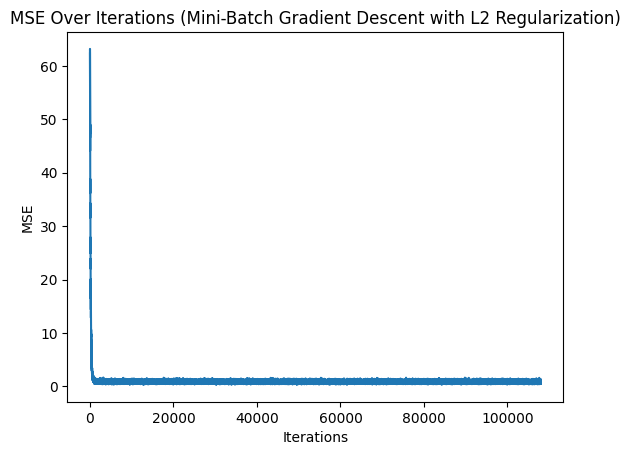

Final Weights (Mini-Batch Gradient Descent with L2 Regularization):  [3.23584772 0.87592845 0.39745323 0.60711875 0.2871552  0.2892328
 0.38261029 0.82194844 0.35130448 1.26064782 0.89010337 1.58131495]


In [ ]:
# Mini-Batch Gradient Descent with L2 Regularization
def mini_batch_gradient_descent_l2(X, Y, weights, learning_rate, epochs, mse_threshold, batch_size, alpha):
    m = len(Y)
    mse_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle the indices
        X_shuffled = X[indices]        # Shuffle X using numpy-style indexing
        Y_shuffled = Y[indices]        # Shuffle Y using numpy-style indexing

        for i in range(0, m, batch_size):
            X_mini = X_shuffled[i:i+batch_size]
            Y_mini = Y_shuffled[i:i+batch_size]

            # Calculate MSE for the mini-batch
            mse, errors = calculate_mse(X_mini, Y_mini, weights)
            mse_history.append(mse)

            # Update the weights with L2 regularization
            gradients = (2/len(Y_mini)) * X_mini.T.dot(errors) + 2 * alpha * weights  # Apply L2 regularization
            weights = weights - learning_rate * gradients

        # Early stopping if MSE is below the threshold
        if mse < mse_threshold:
            print(f"Early stopping at epoch {epoch} with MSE: {mse}")
            break

    return weights, mse_history

# Hyperparameters
learning_rate = 0.001  # Learning rate
epochs = 2000  # Number of epochs (adjusted for faster convergence)
batch_size = 64  # Batch size (tuned for more frequent updates)
alpha = 0.1  # Regularization parameter for L2
mse_threshold = 0.05  # Updated MSE threshold for early stopping

# Initialize weights
weights = np.random.randn(X_train.shape[1] + 1)  # Initialize random weights

# Train the model with L2 Regularization
weights_l2, mse_history_l2 = mini_batch_gradient_descent_l2(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, batch_size, alpha)

# Plot MSE history for Mini-Batch Gradient Descent with L2 Regularization
plt.plot(mse_history_l2)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE Over Iterations (Mini-Batch Gradient Descent with L2 Regularization)')
plt.show()

# Print final weights
print("Final Weights (Mini-Batch Gradient Descent with L2 Regularization): ", weights_l2)


# 4. L1 Regularization (Lasso Regression)

### Modify the gradient descent function to include L1 regularization.

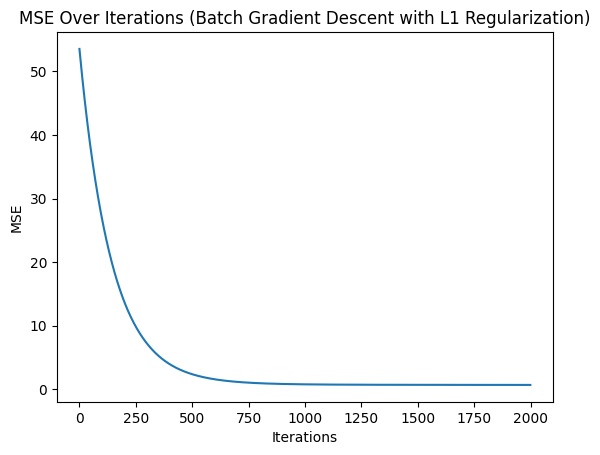

Final Weights (Batch Gradient Descent with L1 Regularization):  [ 3.98437226  0.47283927  0.20659289  0.09617604 -0.8618924   0.29805798
  2.52419602  0.14814124 -0.21220444  1.50482695  0.28309285  1.45661839]


In [ ]:
# Batch Gradient Descent with L1 Regularization (Lasso)
def batch_gradient_descent_l1(X, Y, weights, learning_rate, epochs, mse_threshold, alpha):
    m = len(Y)
    mse_history = []

    for epoch in range(epochs):
        # Calculate MSE and errors
        mse, errors = calculate_mse(X, Y, weights)
        mse_history.append(mse)

        # Early stopping if MSE falls below the threshold
        if mse < mse_threshold:
            print(f"Early stopping at epoch {epoch} with MSE: {mse}")
            break

        # Update weights with L1 regularization
        gradients = 2/m * X.T.dot(errors) + alpha * np.sign(weights)
        weights = weights - learning_rate * gradients

    return weights, mse_history

# Hyperparameters
learning_rate = 0.001  # Learning rate
epochs = 2000  # Number of epochs (adjusted for faster convergence)
mse_threshold = 0.05  # MSE threshold for early stopping
alpha = 0.1  # Regularization parameter for L1

# Initialize weights
weights = np.random.randn(X_train.shape[1] + 1)  # Random weights initialization

# Train the model with L1 Regularization
weights_l1, mse_history_l1 = batch_gradient_descent_l1(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, alpha)

# Plot MSE history for Batch Gradient Descent with L1 Regularization
plt.plot(mse_history_l1)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE Over Iterations (Batch Gradient Descent with L1 Regularization)')
plt.show()

# Print final weights
print("Final Weights (Batch Gradient Descent with L1 Regularization): ", weights_l1)


# 5. Mini-Batch Gradient Descent Without Regularization

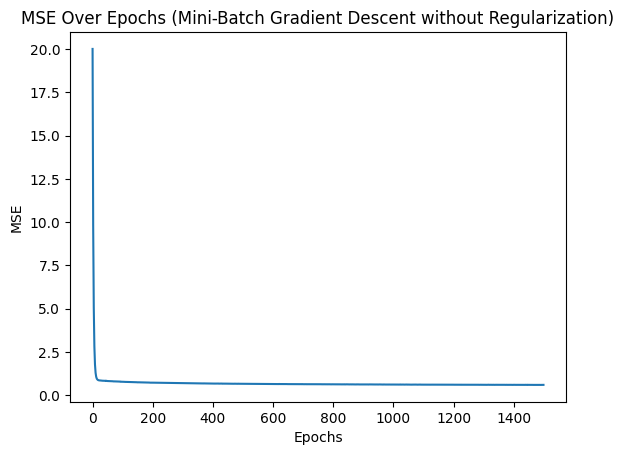

Final Weights (Mini-Batch Gradient Descent):  [ 4.31218808  0.15170315 -1.16605384  1.00903674  0.69960141 -0.22428159
  1.73308825  0.20120839 -0.33095222  0.64345657  0.35499067  2.20710899]


In [ ]:
# Mini-Batch Gradient Descent without Regularization (Modified to record MSE per epoch)
def mini_batch_gradient_descent(X, Y, weights, learning_rate, epochs, mse_threshold, batch_size):
    m = len(Y)
    mse_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle the indices
        X_shuffled = X[indices]        # Shuffle X using numpy-style indexing
        Y_shuffled = Y[indices]        # Shuffle Y using numpy-style indexing

        epoch_mse = 0  # To accumulate the MSE for the entire epoch
        num_batches = 0  # Count number of batches in each epoch

        for i in range(0, m, batch_size):
            X_mini = X_shuffled[i:i+batch_size]
            Y_mini = Y_shuffled[i:i+batch_size]

            # Calculate MSE for the mini-batch
            mse, errors = calculate_mse(X_mini, Y_mini, weights)
            epoch_mse += mse
            num_batches += 1

            # Gradient update for the weights
            gradients = 2/len(Y_mini) * X_mini.T.dot(errors)
            weights = weights - learning_rate * gradients

        # Record average MSE for the epoch
        mse_history.append(epoch_mse / num_batches)

        # Early stopping if MSE is below the threshold
        if mse_history[-1] < mse_threshold:
            print(f"Early stopping at epoch {epoch} with MSE: {mse_history[-1]}")
            break

    return weights, mse_history

# Hyperparameters
learning_rate = 0.001  # Learning rate
epochs = 1500  # Number of epochs
batch_size = 64  # Batch size
mse_threshold = 0.01  # MSE threshold for early stopping

# Initialize weights
np.random.seed(42)
weights = np.random.randn(X_train.shape[1] + 1)  # For n features + bias term

# Add bias term to the training set
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Train the model using Mini-Batch Gradient Descent without Regularization
weights_mini_batch, mse_history_mini_batch = mini_batch_gradient_descent(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, batch_size)

# Plot MSE history for Mini-Batch Gradient Descent without Regularization
plt.plot(mse_history_mini_batch)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Over Epochs (Mini-Batch Gradient Descent without Regularization)')
plt.show()

# Print final weights
print("Final Weights (Mini-Batch Gradient Descent): ", weights_mini_batch)


# 6. Mini-Batch Gradient Descent with L2 Regularization

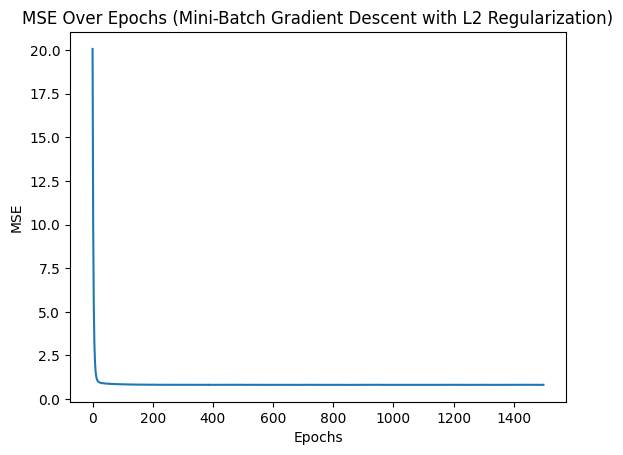

Final Weights (Mini-Batch Gradient Descent with L2 Regularization):  [3.23683672 0.87634334 0.39742086 0.60740609 0.28725909 0.28933924
 0.38278753 0.82235877 0.35140808 1.26081381 0.89064551 1.58176336]


In [ ]:
# Mini-Batch Gradient Descent with L2 Regularization (Modified for Epochs)
def mini_batch_gradient_descent_l2(X, Y, weights, learning_rate, epochs, mse_threshold, batch_size, alpha):
    m = len(Y)
    mse_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle the indices
        X_shuffled = X[indices]        # Shuffle X using numpy-style indexing
        Y_shuffled = Y[indices]        # Shuffle Y using numpy-style indexing

        epoch_mse = 0  # Accumulate MSE for the entire epoch
        num_batches = 0  # Count number of batches in each epoch

        for i in range(0, m, batch_size):
            X_mini = X_shuffled[i:i+batch_size]
            Y_mini = Y_shuffled[i:i+batch_size]

            # Calculate MSE for the mini-batch
            mse, errors = calculate_mse(X_mini, Y_mini, weights)
            epoch_mse += mse
            num_batches += 1

            # Update weights with L2 regularization
            gradients = (2/len(Y_mini)) * X_mini.T.dot(errors) + 2 * alpha * weights  # Apply L2 regularization
            weights = weights - learning_rate * gradients

        # Record the average MSE for the epoch
        mse_history.append(epoch_mse / num_batches)

        # Early stopping if the MSE falls below the threshold
        if mse_history[-1] < mse_threshold:
            print(f"Early stopping at epoch {epoch} with MSE: {mse_history[-1]}")
            break

    return weights, mse_history

# Hyperparameters
learning_rate = 0.001  # Learning rate
epochs = 1500  # Adjusted to show fewer iterations (actual number of epochs)
batch_size = 64  # Batch size
alpha = 0.1  # Regularization parameter for L2
mse_threshold = 0.01  # Early stopping threshold for MSE

# Initialize weights
np.random.seed(42)
weights = np.random.randn(X_train.shape[1] + 1)  # For n features + bias term

# Add bias term to the training set
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Train the model using Mini-Batch Gradient Descent with L2 Regularization
weights_l2, mse_history_l2 = mini_batch_gradient_descent_l2(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, batch_size, alpha)

# Plot MSE history for Mini-Batch Gradient Descent with L2 Regularization
plt.plot(mse_history_l2)
plt.xlabel('Epochs')  # Updated label to show epochs instead of iterations
plt.ylabel('MSE')
plt.title('MSE Over Epochs (Mini-Batch Gradient Descent with L2 Regularization)')
plt.show()

# Print final weights
print("Final Weights (Mini-Batch Gradient Descent with L2 Regularization): ", weights_l2)


# 7. Mini-Batch Gradient Descent with L1 Regularization


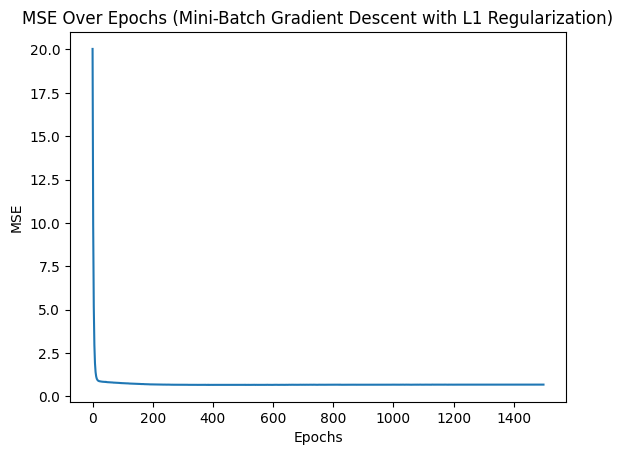

Final Weights (Mini-Batch Gradient Descent with L1 Regularization):  [5.33244169e+00 1.20189225e-04 1.07995705e-04 1.80280065e-04
 1.66935317e-04 8.54301038e-05 1.77839275e-04 2.40684846e-04
 5.86185063e-05 7.62206059e-04 3.29020090e-04 1.20309419e+00]


In [ ]:
# Mini-Batch Gradient Descent with L1 Regularization (Modified for Epochs)
def mini_batch_gradient_descent_l1(X, Y, weights, learning_rate, epochs, mse_threshold, batch_size, alpha):
    m = len(Y)
    mse_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle the indices
        X_shuffled = X[indices]        # Shuffle X using numpy-style indexing
        Y_shuffled = Y[indices]        # Shuffle Y using numpy-style indexing

        epoch_mse = 0  # Accumulate MSE for the entire epoch
        num_batches = 0  # Count number of batches in each epoch

        for i in range(0, m, batch_size):
            X_mini = X_shuffled[i:i+batch_size]
            Y_mini = Y_shuffled[i:i+batch_size]

            # Calculate MSE for the mini-batch
            mse, errors = calculate_mse(X_mini, Y_mini, weights)
            epoch_mse += mse
            num_batches += 1

            # Update weights with L1 regularization
            gradients = (2/len(Y_mini)) * X_mini.T.dot(errors) + alpha * np.sign(weights)  # Apply L1 regularization
            weights = weights - learning_rate * gradients

        # Record the average MSE for the epoch
        mse_history.append(epoch_mse / num_batches)

        # Early stopping if the MSE falls below the threshold
        if mse_history[-1] < mse_threshold:
            print(f"Early stopping at epoch {epoch} with MSE: {mse_history[-1]}")
            break

    return weights, mse_history

# Hyperparameters
learning_rate = 0.001  # Learning rate
epochs = 1500  # Adjusted number of epochs
batch_size = 64  # Batch size
alpha = 0.1  # Regularization parameter for L1
mse_threshold = 0.01  # Early stopping threshold for MSE

# Initialize weights
np.random.seed(42)
weights = np.random.randn(X_train.shape[1] + 1)  # For n features + bias term

# Add bias term to the training set
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Train the model using Mini-Batch Gradient Descent with L1 Regularization
weights_l1, mse_history_l1 = mini_batch_gradient_descent_l1(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, batch_size, alpha)

# Plot MSE history for Mini-Batch Gradient Descent with L1 Regularization
plt.plot(mse_history_l1)
plt.xlabel('Epochs')  # Updated label to show epochs instead of iterations
plt.ylabel('MSE')
plt.title('MSE Over Epochs (Mini-Batch Gradient Descent with L1 Regularization)')
plt.show()

# Print final weights
print("Final Weights (Mini-Batch Gradient Descent with L1 Regularization): ", weights_l1)


# 8. Comparing All Methods

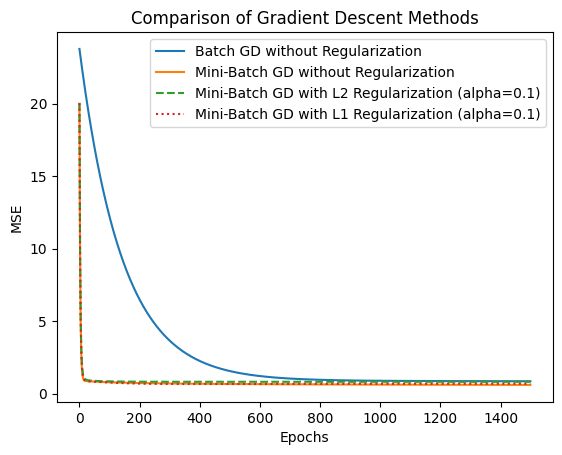

In [ ]:
# Track MSE for Batch Gradient Descent
weights_batch, mse_history_batch = batch_gradient_descent(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold)

# Track MSE for Mini-Batch Gradient Descent without Regularization
weights_mini_batch, mse_history_mini_batch = mini_batch_gradient_descent(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, batch_size)

# Track MSE for Mini-Batch Gradient Descent with L2 Regularization
weights_l2, mse_history_l2 = mini_batch_gradient_descent_l2(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, batch_size, alpha=0.1)

# Track MSE for Mini-Batch Gradient Descent with L1 Regularization
weights_l1, mse_history_l1 = mini_batch_gradient_descent_l1(X_train_with_bias, Y_train.to_numpy(), weights, learning_rate, epochs, mse_threshold, batch_size, alpha=0.1)

# Now Plot the Comparison
plt.plot(mse_history_batch, label='Batch GD without Regularization')  # Already per epoch
plt.plot(mse_history_mini_batch, label='Mini-Batch GD without Regularization')  # Updated to track per epoch
plt.plot(mse_history_l2, label='Mini-Batch GD with L2 Regularization (alpha=0.1)', linestyle='--')  # L2 updated for epochs
plt.plot(mse_history_l1, label='Mini-Batch GD with L1 Regularization (alpha=0.1)', linestyle=':')  # L1 updated for epochs

plt.xlabel('Epochs')  # Correct label for epochs
plt.ylabel('MSE')
plt.title('Comparison of Gradient Descent Methods')
plt.legend()
plt.show()


# Final MSE Values and Predictions

In [ ]:
# Calculate and print final MSE for each method on the training set
final_mse_batch = mse_history_batch[-1]
final_mse_mini_batch = mse_history_mini_batch[-1]
final_mse_l2 = mse_history_l2[-1]
final_mse_l1 = mse_history_l1[-1]

print(f"Final MSE for Batch GD without Regularization: {final_mse_batch}")
print(f"Final MSE for Mini-Batch GD without Regularization: {final_mse_mini_batch}")
print(f"Final MSE for Mini-Batch GD with L2 Regularization: {final_mse_l2}")
print(f"Final MSE for Mini-Batch GD with L1 Regularization: {final_mse_l1}")

# Test set evaluation (assuming you have X_test and Y_test prepared)
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias term to the test set

# Predictions using the final weights
predictions_batch = np.dot(X_test_with_bias, weights_batch)
predictions_mini_batch = np.dot(X_test_with_bias, weights_mini_batch)
predictions_l2 = np.dot(X_test_with_bias, weights_l2)
predictions_l1 = np.dot(X_test_with_bias, weights_l1)

# Calculate MSE on the test set for each method
mse_test_batch = np.mean((predictions_batch - Y_test.to_numpy()) ** 2)
mse_test_mini_batch = np.mean((predictions_mini_batch - Y_test.to_numpy()) ** 2)
mse_test_l2 = np.mean((predictions_l2 - Y_test.to_numpy()) ** 2)
mse_test_l1 = np.mean((predictions_l1 - Y_test.to_numpy()) ** 2)

# Print final MSE on the test set
print(f"Test MSE for Batch GD without Regularization: {mse_test_batch}")
print(f"Test MSE for Mini-Batch GD without Regularization: {mse_test_mini_batch}")
print(f"Test MSE for Mini-Batch GD with L2 Regularization: {mse_test_l2}")
print(f"Test MSE for Mini-Batch GD with L1 Regularization: {mse_test_l1}")


Final MSE for Batch GD without Regularization: 0.8500905837265067
Final MSE for Mini-Batch GD without Regularization: 0.5992996548599393
Final MSE for Mini-Batch GD with L2 Regularization: 0.8131876675512977
Final MSE for Mini-Batch GD with L1 Regularization: 0.6716635062426979
Test MSE for Batch GD without Regularization: 0.7704809898422351
Test MSE for Mini-Batch GD without Regularization: 0.5393809702949008
Test MSE for Mini-Batch GD with L2 Regularization: 0.7466650098157934
Test MSE for Mini-Batch GD with L1 Regularization: 0.5754794480985971


# Plotting the Regression Line for the Largest Component of w:

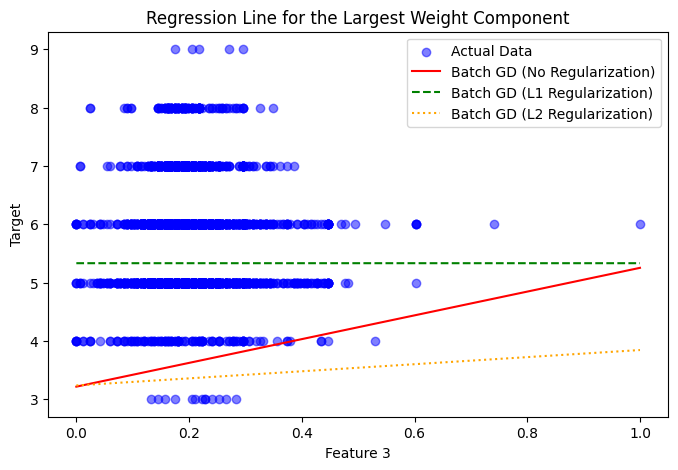

In [ ]:
# Ensure necessary libraries are imported
import numpy as np
import matplotlib.pyplot as plt

# Calculate MSE function
def calculate_mse(X, Y, weights):
    predictions = np.dot(X, weights)
    errors = predictions - Y
    mse = np.mean(errors**2)
    return mse, errors

# Assuming you have already trained your models, find the index of the largest weight (absolute value)
largest_weight_idx = np.argmax(np.abs(weights_batch[1:])) + 1  # Exclude bias term

# Extract the largest feature from the training set (Pandas DataFrame version using iloc)
X_largest_feature = X_train.iloc[:, largest_weight_idx - 1].values.reshape(-1, 1)  # Use the largest feature
X_largest_feature_with_bias = np.c_[np.ones(X_largest_feature.shape[0]), X_largest_feature]  # Add bias term

# Sorting the feature values for clean plotting
sorted_idx = np.argsort(X_largest_feature[:, 0])

# **Only select the weights corresponding to the bias and the largest feature**
weights_batch_selected = np.array([weights_batch[0], weights_batch[largest_weight_idx]])
weights_l1_selected = np.array([weights_l1[0], weights_l1[largest_weight_idx]])
weights_l2_selected = np.array([weights_l2[0], weights_l2[largest_weight_idx]])

# Plot the actual data and regression lines
plt.figure(figsize=(8, 5))

# Scatter the actual data points
plt.scatter(X_largest_feature[:, 0], Y_train, color='blue', label='Actual Data', alpha=0.5)

# Plot predictions from the refitted models using the selected weights
plt.plot(X_largest_feature[sorted_idx, 0], np.dot(X_largest_feature_with_bias, weights_batch_selected)[sorted_idx], color='red', label='Batch GD (No Regularization)')
plt.plot(X_largest_feature[sorted_idx, 0], np.dot(X_largest_feature_with_bias, weights_l1_selected)[sorted_idx], color='green', linestyle='--', label='Batch GD (L1 Regularization)')
plt.plot(X_largest_feature[sorted_idx, 0], np.dot(X_largest_feature_with_bias, weights_l2_selected)[sorted_idx], color='orange', linestyle=':', label='Batch GD (L2 Regularization)')

plt.xlabel(f'Feature {largest_weight_idx}')
plt.ylabel('Target')
plt.title('Regression Line for the Largest Weight Component')
plt.legend()
plt.show()


# Final Model Evaluation

In [ ]:
# Calculate MSE for the test set using Batch Gradient Descent and Regularization methods
mse_batch_test, _ = calculate_mse(X_test_with_bias, Y_test, weights_batch)
mse_l1_test, _ = calculate_mse(X_test_with_bias, Y_test, weights_l1)
mse_l2_test, _ = calculate_mse(X_test_with_bias, Y_test, weights_l2)

print("Test MSE for Batch GD (No Regularization):", mse_batch_test)
print("Test MSE for Batch GD (L1 Regularization):", mse_l1_test)
print("Test MSE for Batch GD (L2 Regularization):", mse_l2_test)


Test MSE for Batch GD (No Regularization): 0.7704809898422351
Test MSE for Batch GD (L1 Regularization): 0.5754794480985971
Test MSE for Batch GD (L2 Regularization): 0.7466650098157934
